In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("./Downloads/house_prices/train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


목표(종속)변수 : SalePrice

독립변수 : 나머지 변수들

1. 목표 변수 값에 영향을 미치는 요인 변수?

MSZoning, Condition1, YearBuilt, Bedroom

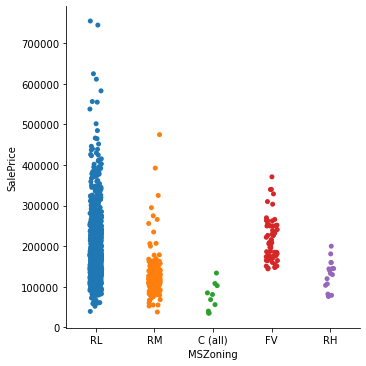

In [307]:
# MSZoning

sns.catplot(data=df, x="MSZoning", y="SalePrice")

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

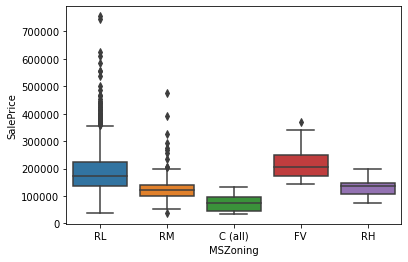

In [306]:
sns.boxplot(data =df, x="MSZoning", y="SalePrice")

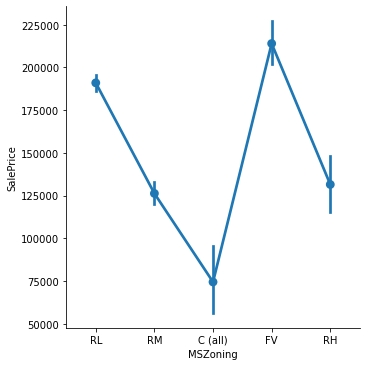

In [134]:
sns.catplot(x = "MSZoning", y="SalePrice", kind = "point", data = df)

<AxesSubplot:xlabel='MSZoning'>

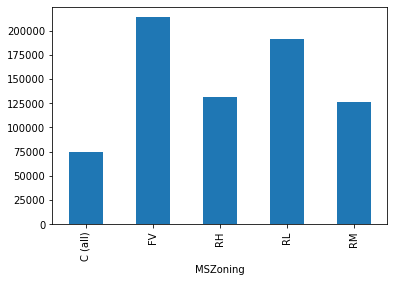

In [154]:
df.groupby("MSZoning").mean().SalePrice.plot.bar()

거주지 분류는 마을 형태 (FV)가 가장 높다.

In [146]:
# Condition1

df["Condition1"].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

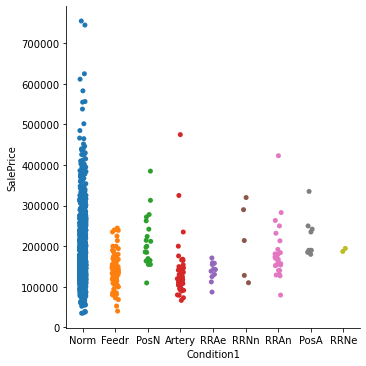

In [192]:
sns.catplot(x="Condition1", y="SalePrice",data=df)

<AxesSubplot:xlabel='Condition1'>

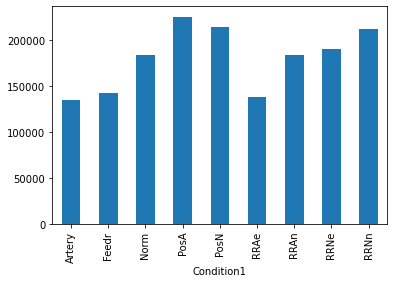

In [151]:
df.groupby("Condition1").mean().SalePrice.plot.bar()

condition1은 SalePrice에 영향을 끼치는걸 알 수 있다. 그러나 각 조건에서 분산값이 커서 SalePrice에 큰 영향을 끼치는것 같진 않다.

In [220]:
df[["YearBuilt","SalePrice"]].corr()

,YearBuilt,SalePrice
YearBuilt,1.000000,0.522897
SalePrice,0.522897,1.000000


<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

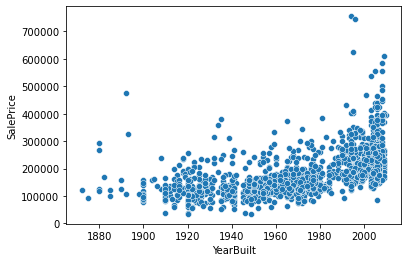

In [218]:
sns.scatterplot(data=df, x = "YearBuilt", y = "SalePrice")

건축년도와 판매가격은 양의 상관관계를 갖고 있다.

In [228]:
df.keys()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [232]:
# bedroom

df[["BedroomAbvGr","SalePrice"]].corr()

,BedroomAbvGr,SalePrice
BedroomAbvGr,1.000000,0.168213
SalePrice,0.168213,1.000000


<AxesSubplot:xlabel='BedroomAbvGr', ylabel='SalePrice'>

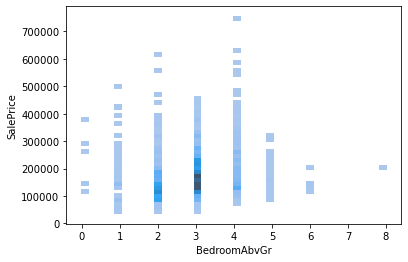

In [249]:
sns.histplot(data = df, x="BedroomAbvGr", y="SalePrice")

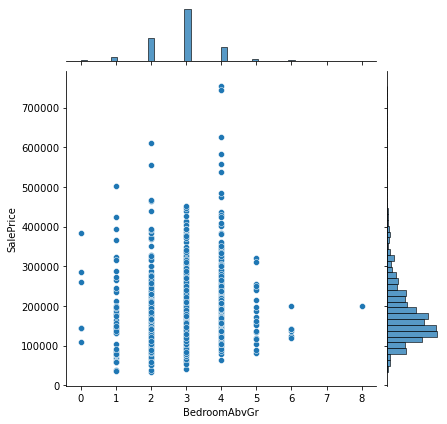

In [267]:
sns.jointplot(data=df, x="BedroomAbvGr", y="SalePrice")

방의 개수는 약한 양의 상관관계를 갖고 있고 방의 개수가 4개일 때 가장 높은 가격을 갖고 있다

2. 시각화

독립변수 전체와 SalePrice 관계

- (x 축) MSZoning, Street, Alley, LotShape ...의 종류에 따른 SalePrice를 boxplot 형태로 표현

- pairplot

In [302]:
df["Street"].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

<AxesSubplot:xlabel='Street', ylabel='SalePrice'>

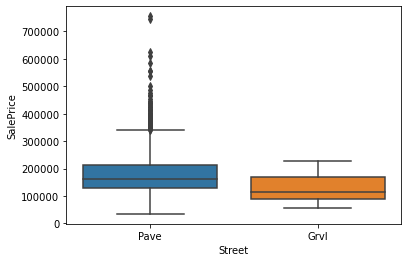

In [300]:
# Street

sns.boxplot(data =df, x="Street", y="SalePrice")

포장된 도로가 있는 집이 비포장되있는 집보다 가격이 높다

<AxesSubplot:xlabel='Alley', ylabel='SalePrice'>

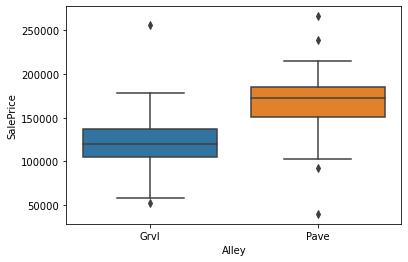

In [304]:
# Alley

sns.boxplot(data =df, x="Alley", y="SalePrice")

집에 접근할 때 포장도로가 있는 집이 가격이 확실히 높은게 보여진다

<AxesSubplot:xlabel='LotShape', ylabel='SalePrice'>

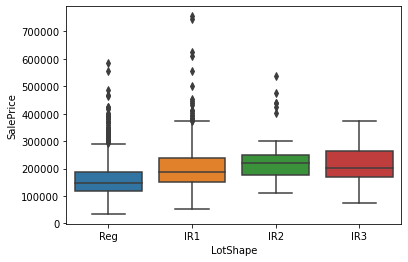

In [305]:
# LotShape

sns.boxplot(data =df, x="LotShape", y="SalePrice")

건물 형태는 일반적인 형태보다 비 표준적인 집들의 가격이 평균적으로 더 높다

In [309]:
# sns.pairplot(df)
# 컴퓨터가 힘들어해요..

3. 상관계수

<AxesSubplot:>

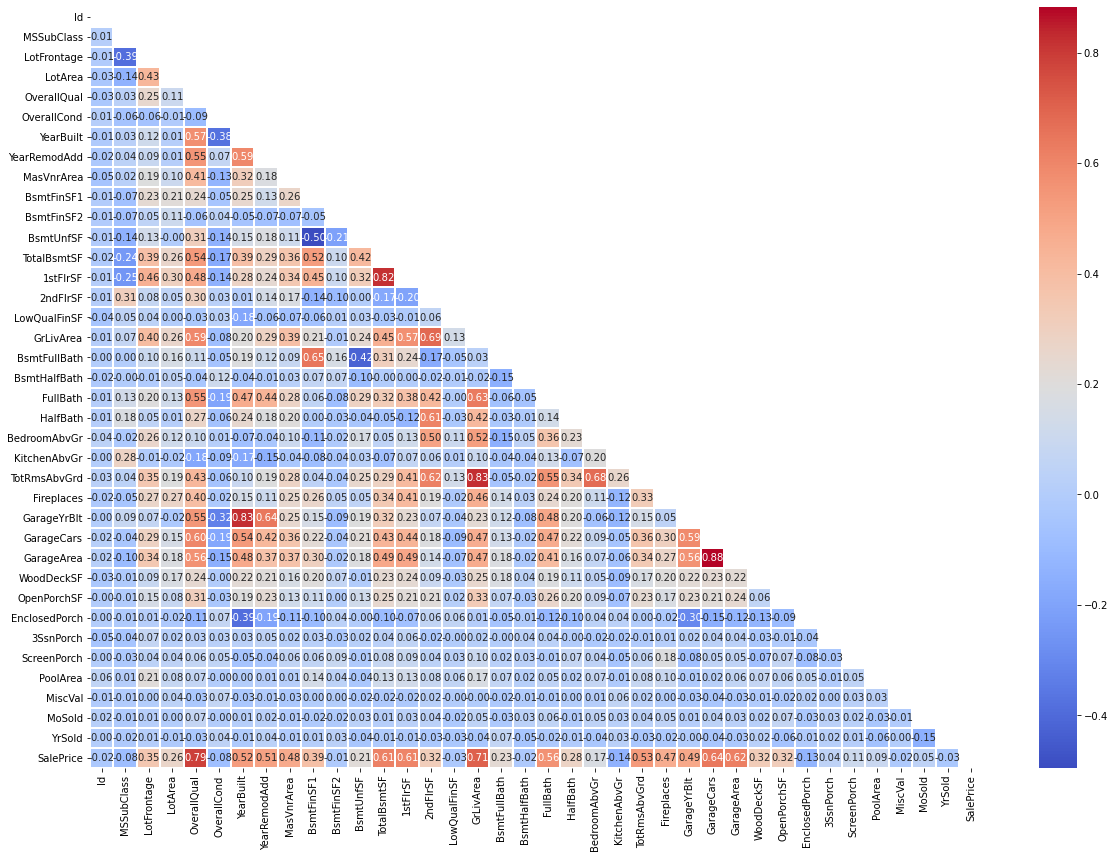

In [277]:
plt.figure(figsize = (20,14))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, annot=True, fmt = ".2f", lw = 1, mask=mask, cmap="coolwarm")

In [298]:
# SalePrice와 상관계수가 높은 10개 컬럼
corr["SalePrice"].sort_values(ascending=False)[1:11].to_frame()

,SalePrice
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897
YearRemodAdd,0.507101
